In [1]:
from matplotlib import pyplot as plt
import pandas as pd

df_rewards = pd.concat((
    pd.read_csv('./out/mabtree_rewards.csv', index_col=[0, 1]),
    pd.read_csv('./out/baseline_rewards.csv', index_col=[0, 1]),
))

df_rewards

reward     reward.1     reward.2  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    45.174603    41.577165    40.508651   
                    2024-10-03    86.545414    81.452443    89.154484   
                    2024-10-04   118.748469   113.329109   120.637540   
                    2024-10-05   147.915249   147.838546   156.814206   
                    2024-10-06   179.520006   171.352713   201.622540   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2119.122955  2148.394940  2148.246453   
                    2024-11-27  2161.707399  2192.694940  2184.862008   
                    2024-11-28  2218.384066  2249.839385  2240.930064   
                    2024-11-29  2265.542399  2294.813274  2282.488397   
                    2024-11-30  2300.234344  2333.869940  2319.098050   

                                   reward.3     reward.4     reward.5  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    49.543968    44.321383    32.615437   
                    2024-10-03    85.379206    81.904717    79.174325   
                    2024-10-04   120.970476   118.142494   119.988214   
                    2024-10-05   156.877976   152.681383   157.960992   
                    2024-10-06   190.147698   183.781383   196.613770   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2193.493160  2220.359081  2238.878501   
                    2024-11-27  2228.319549  2254.507692  2273.159335   
                    2024-11-28  2289.669549  2306.759908  2333.900446   
                    2024-11-29  2337.289538  2353.927686  2385.060446   
                    2024-11-30  2377.456204  2393.328797  2419.620446   

                                   reward.6     reward.7     reward.8  \
                    createdAt                                           
MABTree ε-greedy MF 2024-10-02    39.966042    43.959671    49.924992   
                    2024-10-03    84.302708    85.990643    93.811721   
                    2024-10-04   126.674159   128.499512   143.385116   
                    2024-10-05   167.052810   165.321665   179.525671   
                    2024-10-06   206.232095   198.110554   213.180671   
...                                     ...          ...          ...   
ε-greedy            2024-11-26  2296.118007  2272.708641  2269.087489   
                    2024-11-27  2331.238563  2310.124536  2307.242766   
                    2024-11-28  2385.035728  2371.191917  2363.386933   
                    2024-11-29  2436.743466  2430.171084  2409.960266   
                    2024-11-30  2472.210127  2468.272195  2449.061377   

                                   reward.9  
                    createdAt                
MABTree ε-greedy MF 2024-10-02    53.404454  
                    2024-10-03    91.268621  
                    2024-10-04   129.854177  
                    2024-10-05   174.144238  
                    2024-10-06   210.209238  
...                                     ...  
ε-greedy            2024-11-26  2242.908297  
                    2024-11-27  2279.779131  
                    2024-11-28  2345.732901  
                    2024-11-29  2392.799567  
                    2024-11-30  2429.491631  

[420 rows x 10 columns]

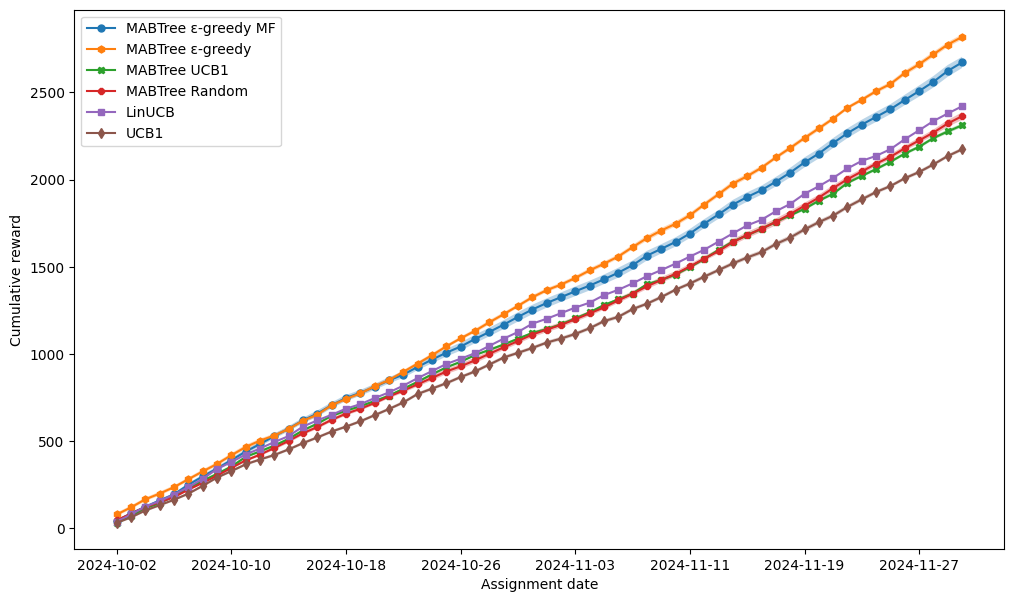

In [2]:
plt.figure(figsize=(12, 7))
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
for marker, (name, group) in zip(['o', 'h', 'X', '8', 's', 'd'], df_rewards.groupby(level=0, sort=False)):
    m = group.mean(axis=1)
    s = group.std(axis=1)

    CI_min = m - 1.96 * s / group.shape[1] ** 0.5
    CI_max = m + 1.96 * s / group.shape[1] ** 0.5

    plt.plot(group.index.get_level_values(1), m, label=name, marker=marker, markersize=5)
    plt.fill_between(group.index.get_level_values(1), CI_min, CI_max, alpha=0.3)

plt.ylabel('Cumulative reward')
plt.xlabel('Assignment date')
plt.legend()
plt.savefig('./out/cumulative_reward.pdf', format='pdf', bbox_inches='tight')
plt.show()

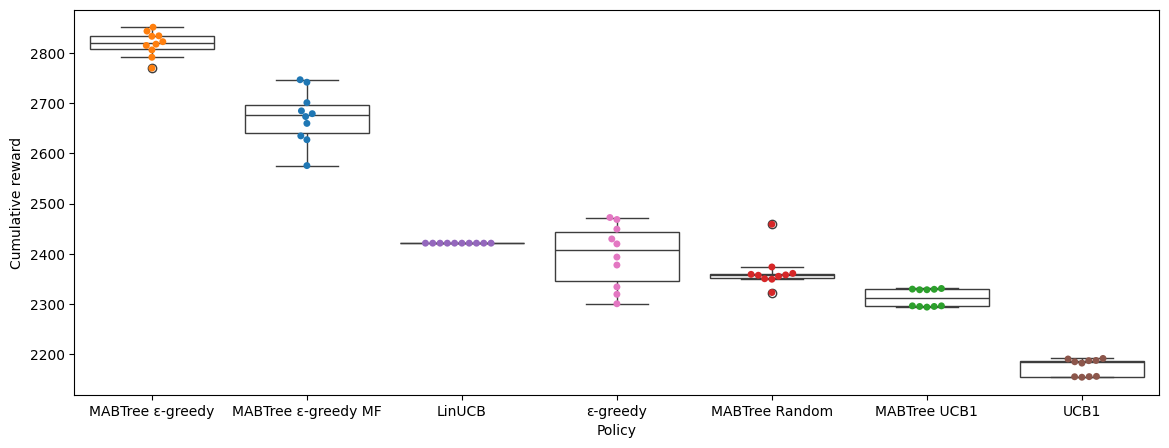

In [3]:
import seaborn as sns
final_cumulative_reward = df_rewards.groupby(level=0, sort=False).last().T
rank = final_cumulative_reward.median().sort_values(ascending=False).index

plt.figure(figsize=(14, 5))
sns.boxplot(data=final_cumulative_reward, color='white', order=rank)
sns.swarmplot(data=final_cumulative_reward)
plt.ylabel('Cumulative reward')
plt.xlabel('Policy')
plt.savefig('./out/cumulative_reward_2.pdf', format='pdf')
plt.show()

In [4]:
final_cumulative_reward = final_cumulative_reward.reset_index(drop=True)
final_cumulative_reward

,MABTree ε-greedy MF,MABTree ε-greedy,MABTree UCB1,MABTree Random,LinUCB,UCB1,ε-greedy
0,2635.023826,2770.090069,2294.839028,2360.801846,2421.07955,2181.882870,2300.234344
1,2627.394938,2822.891998,2329.075048,2322.655520,2421.07955,2191.169105,2333.869940
2,2684.883593,2791.808117,2296.042316,2357.072588,2421.07955,2154.898758,2319.098050
3,2679.304611,2843.914655,2328.181715,2458.806880,2421.07955,2187.171327,2377.456204
4,2575.771267,2817.907641,2294.792316,2350.179753,2421.07955,2155.401049,2393.328797
5,2659.926180,2834.547832,2330.681715,2355.031451,2421.07955,2186.737994,2419.620446
6,2673.561689,2851.710571,2293.542316,2349.199943,2421.07955,2153.732091,2472.210127
7,2701.239987,2806.454807,2329.431715,2373.585133,2421.07955,2190.074660,2468.272195
8,2741.987923,2815.339217,2296.042316,2357.747121,2421.07955,2154.664383,2449.061377
9,2746.996087,2833.656292,2328.181715,2358.864841,2421.07955,2184.571327,2429.491631


In [5]:
from scipy import stats

print(f"{stats.kruskal(*[final_cumulative_reward[col] for col in final_cumulative_reward.columns]).pvalue:.2e}")

1.07e-11


In [6]:
from itertools import combinations

pd.DataFrame([
    [a, b, stats.wilcoxon(final_cumulative_reward[a], final_cumulative_reward[b]).pvalue]
    for a, b in combinations(final_cumulative_reward.columns, 2)
], columns=['A', 'B', 'p-value'])

,A,B,p-value
0,MABTree ε-greedy MF,MABTree ε-greedy,0.001953
1,MABTree ε-greedy MF,MABTree UCB1,0.001953
2,MABTree ε-greedy MF,MABTree Random,0.001953
3,MABTree ε-greedy MF,LinUCB,0.001953
4,MABTree ε-greedy MF,UCB1,0.001953
5,MABTree ε-greedy MF,ε-greedy,0.001953
6,MABTree ε-greedy,MABTree UCB1,0.001953
7,MABTree ε-greedy,MABTree Random,0.001953
8,MABTree ε-greedy,LinUCB,0.001953
9,MABTree ε-greedy,UCB1,0.001953


# Entropy analysis

In [7]:
df_entropy = pd.concat((
    pd.read_csv('./out/mabtree_entropies.csv', index_col=0),
    pd.read_csv('./out/baseline_entropies.csv', index_col=0),
), axis=1)

df_entropy

,MABTree ε-greedy MF,MABTree ε-greedy,MABTree UCB1,MABTree Random,LinUCB,UCB1,ε-greedy
0,3.583401,2.251807,2.793193,4.230062,3.055328,2.976316,2.130540
1,3.584976,2.262746,2.805048,4.227759,3.055328,2.986354,2.135030
2,3.608922,2.254497,2.799895,4.236890,3.055328,2.984363,2.129428
3,3.568474,2.265627,2.804181,4.234522,3.055328,2.985507,2.135032
4,3.505650,2.263721,2.799856,4.235392,3.055328,2.984094,2.131061
5,3.576716,2.263662,2.804235,4.234795,3.055328,2.985804,2.134820
6,3.446121,2.255400,2.799841,4.233202,3.055328,2.984017,2.122517
7,3.508049,2.264637,2.804196,4.226187,3.055328,2.985608,2.130687
8,3.558210,2.253300,2.799895,4.237244,3.055328,2.984313,2.126479
9,3.598953,2.253980,2.804181,4.239123,3.055328,2.985483,2.133254


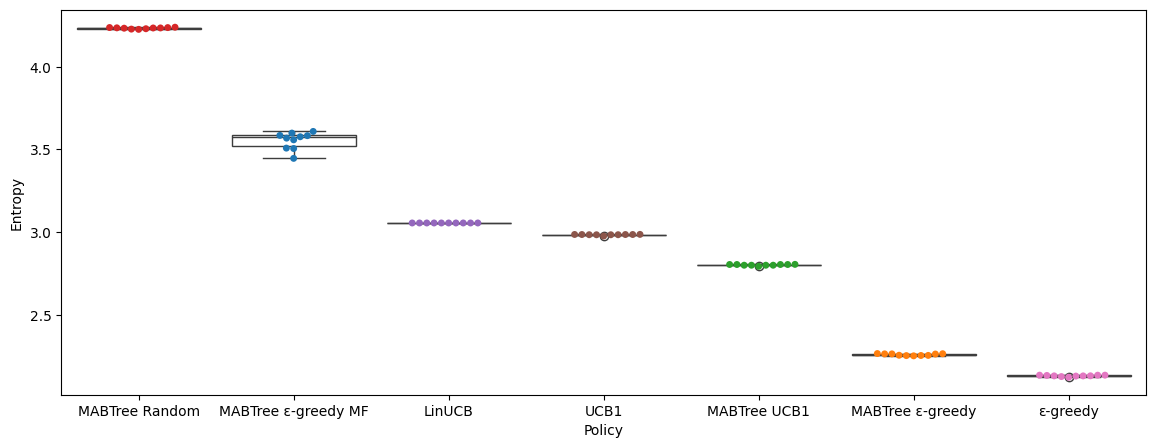

In [8]:
rank = df_entropy.median().sort_values(ascending=False).index

plt.figure(figsize=(14, 5))
sns.boxplot(data=df_entropy, color='white', order=rank)
sns.swarmplot(data=df_entropy)
plt.ylabel('Entropy')
plt.xlabel('Policy')
plt.show()

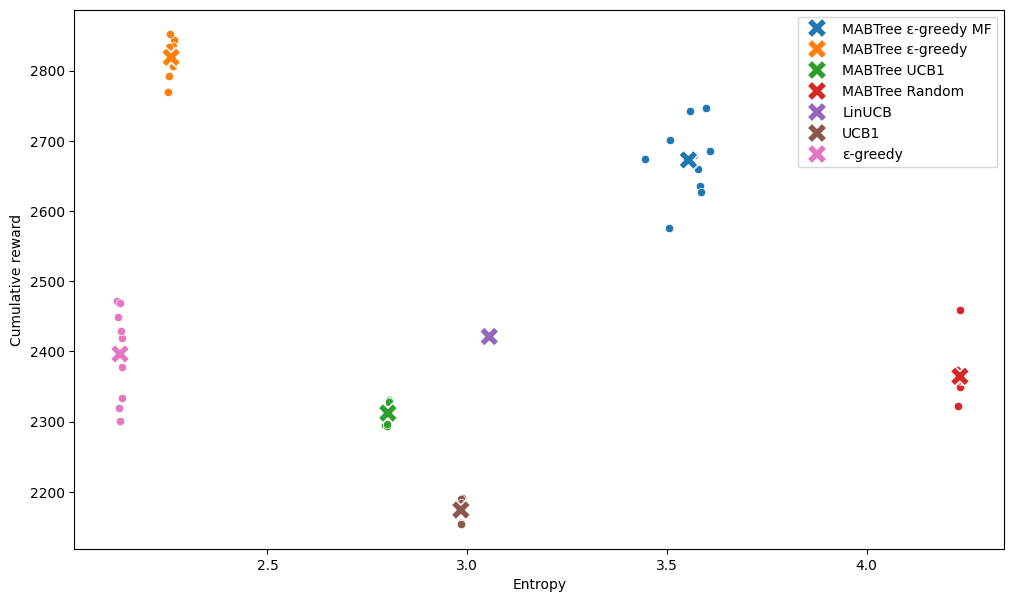

In [9]:
ax = plt.figure(figsize=(12, 7)).gca()
for x, y in zip(df_entropy, final_cumulative_reward):
    sns.scatterplot(x=df_entropy[x], y=final_cumulative_reward[y], ax=ax)
sns.scatterplot(x=df_entropy.mean(axis=0), y=final_cumulative_reward.mean(axis=0), hue=df_entropy.columns, s=200, marker='X', ax=ax)

plt.xlabel('Entropy')
plt.ylabel('Cumulative reward')
plt.legend()
plt.show()

# Coverage

In [10]:
df_coverage = pd.concat((
    pd.read_csv('./out/mabtree_coverages.csv', index_col=0),
    pd.read_csv('./out/baseline_coverages.csv', index_col=0),
), axis=1)

df_coverage

,MABTree ε-greedy MF,MABTree ε-greedy,MABTree UCB1,MABTree Random,LinUCB,UCB1,ε-greedy
0,0.597812,0.309794,0.343786,0.775377,0.460782,0.392054,0.300680
1,0.594073,0.313406,0.350648,0.774485,0.460782,0.398853,0.302656
2,0.605439,0.309900,0.347610,0.775781,0.460782,0.396537,0.300637
3,0.591906,0.313023,0.349904,0.775335,0.460782,0.397960,0.301296
4,0.578670,0.312003,0.347610,0.776737,0.460782,0.396516,0.301976
5,0.595369,0.311069,0.349926,0.775547,0.460782,0.398109,0.302209
6,0.565328,0.309433,0.347589,0.775547,0.460782,0.396346,0.300000
7,0.586956,0.311706,0.349926,0.772573,0.460782,0.398130,0.301742
8,0.591268,0.310771,0.347610,0.776461,0.460782,0.396516,0.300829
9,0.603505,0.308201,0.349904,0.776673,0.460782,0.397939,0.302018


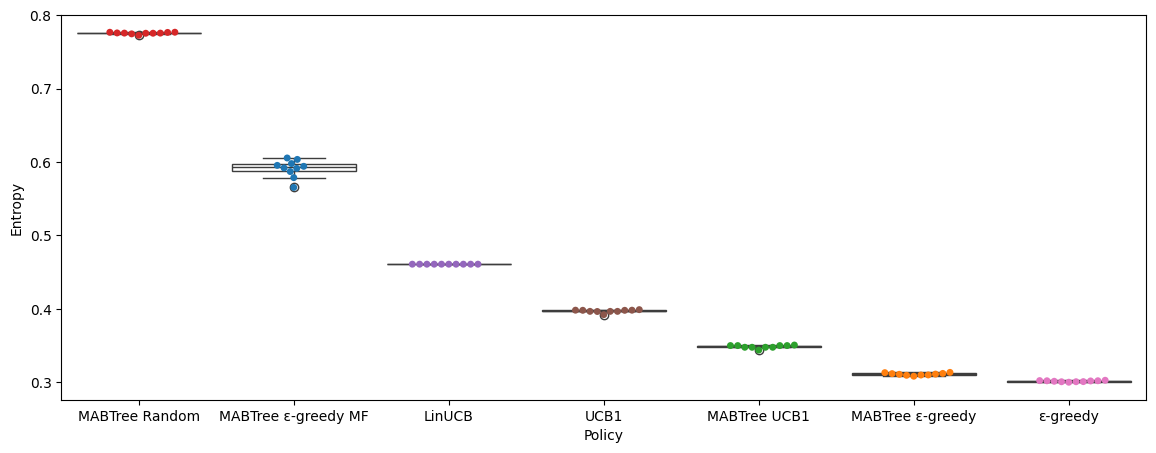

In [11]:
rank = df_coverage.median().sort_values(ascending=False).index

plt.figure(figsize=(14, 5))
sns.boxplot(data=df_coverage, color='white', order=rank)
sns.swarmplot(data=df_coverage)
plt.ylabel('Entropy')
plt.xlabel('Policy')
plt.show()

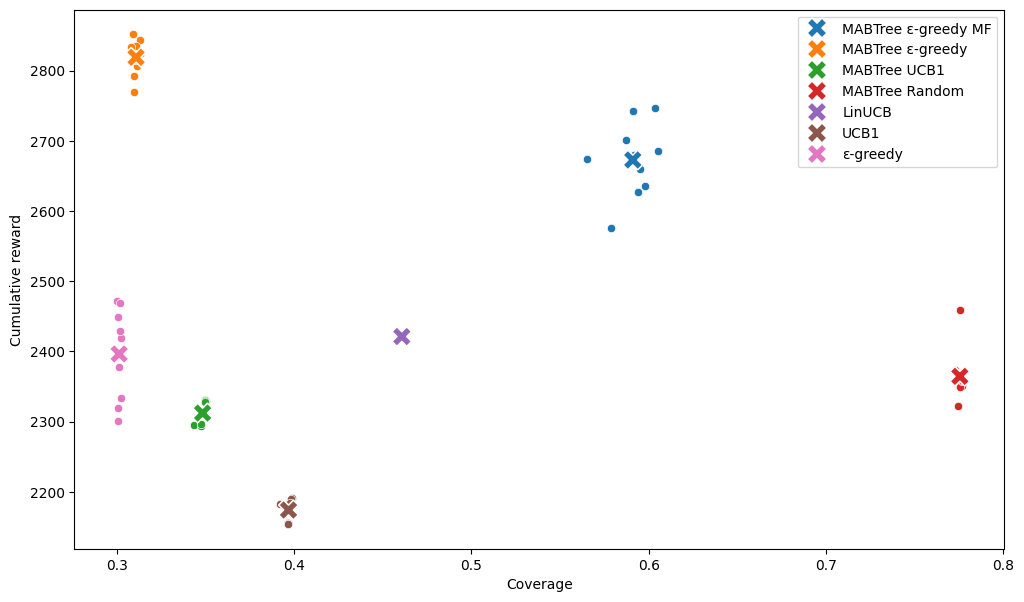

In [12]:
ax = plt.figure(figsize=(12, 7)).gca()
for x, y in zip(df_coverage, final_cumulative_reward):
    sns.scatterplot(x=df_coverage[x], y=final_cumulative_reward[y], ax=ax)
sns.scatterplot(x=df_coverage.mean(axis=0), y=final_cumulative_reward.mean(axis=0), hue=df_coverage.columns, s=200, marker='X', ax=ax)

plt.xlabel('Coverage')
plt.ylabel('Cumulative reward')
plt.legend()
plt.show()